170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training CNN...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 37ms/step - accuracy: 0.3497 - loss: 1.7628 - val_accuracy: 0.5434 - val_loss: 1.2923
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.5659 - loss: 1.2244 - val_accuracy: 0.5735 - val_loss: 1.1926
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.6295 - loss: 1.0596 - val_accuracy: 0.6414 - val_loss: 1.0259
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.6611 - loss: 0.9709 - val_accuracy: 0.6511 - val_loss: 1.0306
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.6857 - loss: 0.9093 - val_accuracy: 0.6410 - val_loss: 1.0374
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.7042 - loss: 0.8535 - val_accuracy: 0.6677 - val_loss: 0.9724
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.7207 - loss: 0.8106 - val_accuracy: 0.6823 - val_loss: 0.9347
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 38ms/step - ac

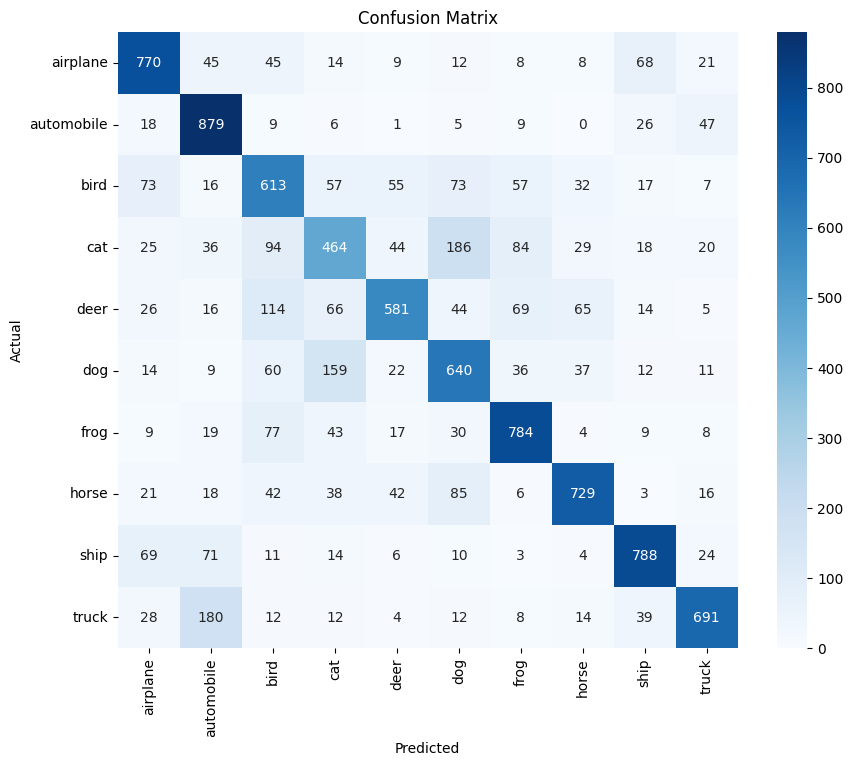

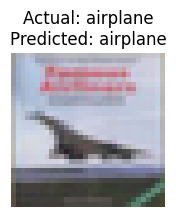

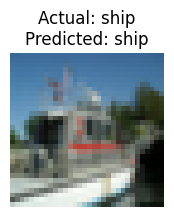

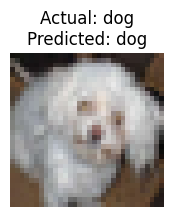

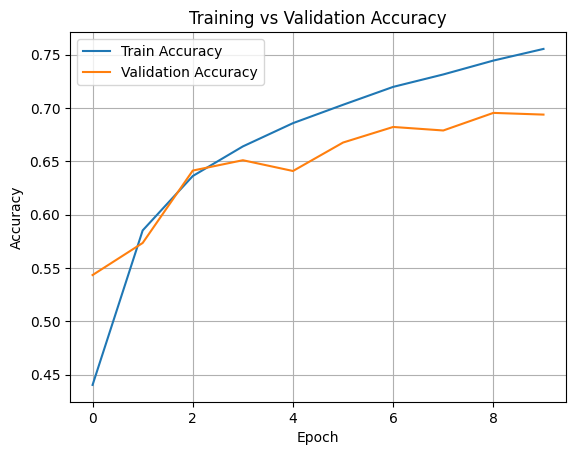

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Normalize image data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Function to plot a sample image
def plot_sample(X, y, index):
    plt.figure(figsize=(2,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    plt.axis('off')
    plt.show()

# Define the CNN model
cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the CNN model
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the model and save training history
print("Training CNN...")
history = cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Predict on test data
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes, target_names=classes))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Function to display prediction for a sample image
def show_prediction(index):
    plt.figure(figsize=(2,2))
    plt.imshow(X_test[index])
    plt.title(f"Actual: {classes[y_test[index]]}\nPredicted: {classes[y_pred_classes[index]]}")
    plt.axis('off')
    plt.show()

# Show predictions for a few test images
for i in [3, 600, 1000]:
    show_prediction(i)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()
